In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import xgboost as xgb 

In [2]:
df = pd.read_csv("C:\\Users\\mesho\\OneDrive\\Desktop\\ML Assignment\\case_time_series.csv")
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
490,3 June 2021,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,4 June 2021,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,5 June 2021,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,6 June 2021,2021-06-06,101209,28909437,174156,27150821,2444,348638


Let's do get some summary statastics of the dataframe 

In [3]:
df.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,495.000000,4.950000e+02,495.000000,4.950000e+02,495.000000,495.000000
mean,58576.242424,7.037673e+06,55219.569697,6.341560e+06,708.573737,95647.365657
std,88204.247844,7.258510e+06,85635.502147,6.567559e+06,1011.352961,85930.141925
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,8557.500000,2.027795e+05,4460.500000,9.800950e+04,104.000000,5718.000000
50%,25561.000000,6.547422e+06,21969.000000,5.506718e+06,378.000000,101226.000000
75%,65383.000000,1.079726e+07,60438.500000,1.048724e+07,864.500000,154211.000000
max,414280.000000,2.899524e+07,422391.000000,2.733369e+07,4529.000000,350744.000000


In [4]:
df.shape

(495, 8)

In [5]:
# Checking how the data is organized and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             495 non-null    object
 1   Date_YMD         495 non-null    object
 2   Daily Confirmed  495 non-null    int64 
 3   Total Confirmed  495 non-null    int64 
 4   Daily Recovered  495 non-null    int64 
 5   Total Recovered  495 non-null    int64 
 6   Daily Deceased   495 non-null    int64 
 7   Total Deceased   495 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 31.1+ KB


In [6]:
# CHecking null values
df.isnull().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

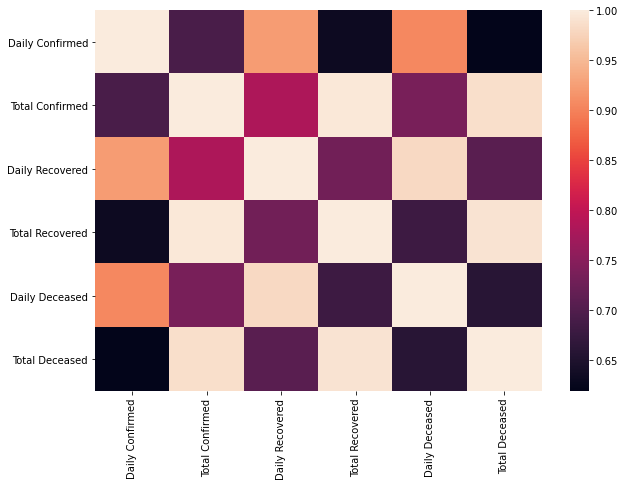

In [7]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr)

In [8]:
df.dtypes

Date               object
Date_YMD           object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

As we can see that the Date_YMD column is an object type so we need to convert into time series from object type

In [9]:
df["Date_YMD"]=pd.to_datetime(df['Date_YMD'])
df.dtypes

Date                       object
Date_YMD           datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

Successfully converted into time-series data type

In [10]:
df.drop(['Date'], axis=1,inplace=True)
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
490,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,2021-06-06,101209,28909437,174156,27150821,2444,348638


In [11]:
df.rename({'Date_YMD':'Date'}, axis=1, inplace=True)
print(df)

          Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0   2020-01-30                1                1                0   
1   2020-01-31                0                1                0   
2   2020-02-01                0                1                0   
3   2020-02-02                1                2                0   
4   2020-02-03                1                3                0   
..         ...              ...              ...              ...   
490 2021-06-03           132424         28573286           206722   
491 2021-06-04           120454         28693740           197763   
492 2021-06-05           114488         28808228           189374   
493 2021-06-06           101209         28909437           174156   
494 2021-06-07            85803         28995240           182866   

     Total Recovered  Daily Deceased  Total Deceased  
0                  0               0               0  
1                  0               0               0  
2     

## Let's see the Maxium and minimun values of the dataset of diiferent parameters 

In [12]:
print(df['Date'].max(), df['Date'].min())

2021-06-07 00:00:00 2020-01-30 00:00:00


In [13]:
print(df['Daily Confirmed'].max(),df['Daily Confirmed'].min())

414280 0


In [14]:
print(df['Total Confirmed'].max(),df['Total Confirmed'].min())

28995240 1


In [15]:
print(df['Daily Recovered'].max(),df['Daily Recovered'].min())

422391 0


In [16]:
print(df['Total Recovered'].max(),df['Total Recovered'].min())

27333687 0


In [17]:
print(df['Daily Deceased'].max(),df['Daily Deceased'].min())

4529 0


In [18]:
print(df['Total Deceased'].max(),df['Total Deceased'].min())

350744 0


From the above Max-Min Analysis we can see that our dataset is spread across date 2021-06-07 and 2020-01-30. The Maximum Daily confirm cases were 414280, Total Confirmed cases are 28995240, Daily recovered cases are 422391, Total Recovered are 27333687, Daily Deceased or Deaths are 4529 and Total Deceased or Deaths are 350744. 

## Let's Try to find out average Daily Confiremed, Daily Recovered, Daily Deceased cases & Total Confirmed, Total Recovered and Total Deceased

In [19]:
df_avg_dconf = df['Daily Confirmed'].mean()
df_avg_tconf = df['Total Confirmed'].mean()
print(df_avg_dconf,df_avg_tconf)

58576.242424242424 7037672.9656565655


In [20]:
df_avg_drecov = df['Daily Recovered'].mean()
df_avg_trecov = df['Total Recovered'].mean()
print(df_avg_drecov,df_avg_trecov)

55219.569696969695 6341559.901010101


In [21]:
df_avg_ddece = df['Daily Deceased'].mean()
df_avg_tdece = df['Total Deceased'].mean()
print(df_avg_ddece,df_avg_tdece)

708.5737373737373 95647.36565656566


#### Plotting Graphs to see the Variation

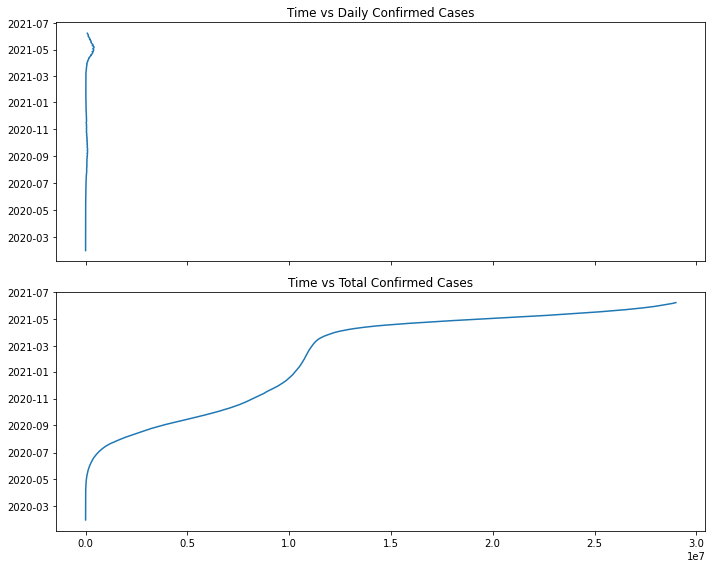

In [22]:
figure, axes = plt.subplots(2,1, figsize = (10,8), sharex=True)
axes[0].plot(df['Daily Confirmed'], df['Date'])
axes[1].plot(df['Total Confirmed'], df['Date'])
axes[0].set_title('Time vs Daily Confirmed Cases')
axes[1].set_title('Time vs Total Confirmed Cases')
figure.tight_layout()

As we can see We're unable to establish any insights from Figure A because the scale is same that of total cases which is quite large, So plotting without sharing X_axis

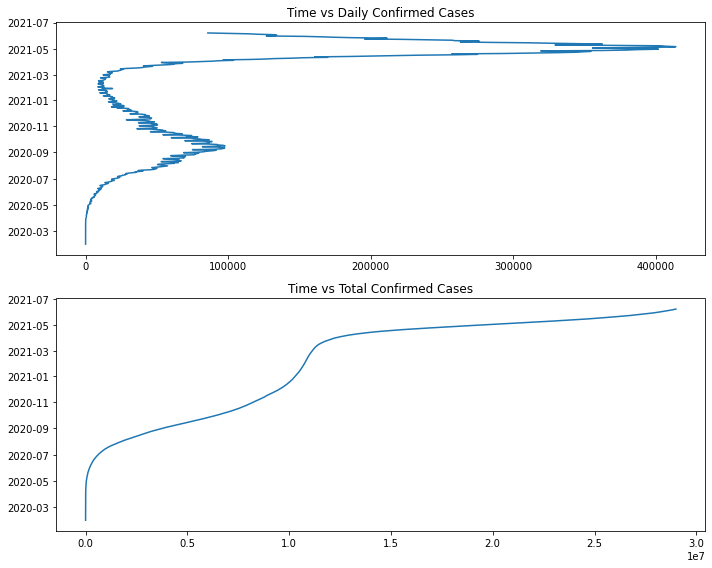

In [23]:
figure, axes = plt.subplots(2,1, figsize = (10,8))
axes[0].plot(df['Daily Confirmed'], df['Date'])
axes[1].plot(df['Total Confirmed'], df['Date'])
axes[0].set_title('Time vs Daily Confirmed Cases')
axes[1].set_title('Time vs Total Confirmed Cases')
figure.tight_layout()

Data Pre-processing

In [24]:
df1 = df.reset_index()['Total Confirmed']

In [25]:
df1.shape

(495,)

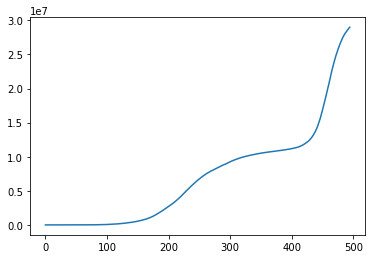

In [26]:
plt.plot(df1)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1.shape

(495, 1)

In [29]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [66]:
training_size,test_size

(321, 174)

In [31]:
train_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.44884207e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [6.89768413e-08],
       [1.37953683e-07],
       [1.72442103e-07],
       [9.31187358e-07],
       [1.00016420e-06],
       [1.03465262e-06],
       [1.13811788e-06],
       [1.31055999e-06],
       [1.62095577e-06],


In [67]:
np.shape(test_size)

()

In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(220, 100)
(220,)


(None, None)

In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Model Training

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 10s 1s/step - loss: 0.0353 - val_loss: 0.1915
Epoch 2/100
4/4 [==============================] - 1s 134ms/step - loss: 0.0073 - val_loss: 0.0248
Epoch 3/100
4/4 [==============================] - 1s 134ms/step - loss: 0.0048 - val_loss: 0.0707
Epoch 4/100
4/4 [==============================] - 1s 132ms/step - loss: 0.0025 - val_loss: 0.0338
Epoch 5/100
4/4 [==============================] - 1s 133ms/step - loss: 8.7453e-04 - val_loss: 0.0050
Epoch 6/100
4/4 [==============================] - 1s 142ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 7/100
4/4 [==============================] - 1s 128ms/step - loss: 4.6075e-04 - val_loss: 0.0140
Epoch 8/100
4/4 [==============================] - 1s 134ms/step - loss: 3.8123e-04 - val_loss: 0.0069
Epoch 9/100
4/4 [==============================] - 1s 129ms/step - loss: 2.6863e-04 - val_loss: 0.0077
Epoch 10/100
4/4 [==============================] - 1s 131ms/step - loss: 2.4838e-04 - val_loss

4/4 [==============================] - 1s 165ms/step - loss: 4.6530e-06 - val_loss: 0.0587
Epoch 81/100
4/4 [==============================] - 1s 170ms/step - loss: 4.6685e-06 - val_loss: 0.0582
Epoch 82/100
4/4 [==============================] - 1s 157ms/step - loss: 4.5097e-06 - val_loss: 0.0581
Epoch 83/100
4/4 [==============================] - 1s 159ms/step - loss: 4.4231e-06 - val_loss: 0.0587
Epoch 84/100
4/4 [==============================] - 1s 159ms/step - loss: 5.0615e-06 - val_loss: 0.0585
Epoch 85/100
4/4 [==============================] - 1s 159ms/step - loss: 4.8999e-06 - val_loss: 0.0583
Epoch 86/100
4/4 [==============================] - 1s 159ms/step - loss: 4.5907e-06 - val_loss: 0.0584
Epoch 87/100
4/4 [==============================] - 1s 158ms/step - loss: 4.5324e-06 - val_loss: 0.0581
Epoch 88/100
4/4 [==============================] - 1s 162ms/step - loss: 4.7011e-06 - val_loss: 0.0580
Epoch 89/100
4/4 [==============================] - 1s 163ms/step - loss: 4.5

In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.4.1'

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [44]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5406399.787503183

In [46]:
math.sqrt(mean_squared_error(ytest,test_predict))

14169227.386751331

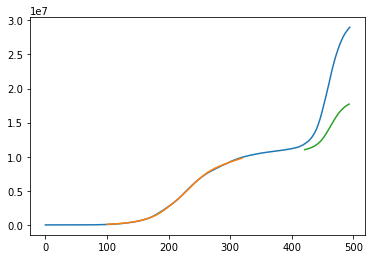

In [47]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

174

In [49]:
x_input=test_data[100:].reshape(1,-1)
x_input.shape

(1, 74)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
temp_input

[0.41069821842130705,
 0.4128582971845826,
 0.4152106144046614,
 0.4171472082020086,
 0.4189832682531087,
 0.42147033173273724,
 0.42427762019826776,
 0.4273478828713914,
 0.43055509906298756,
 0.43413479019779766,
 0.43746509556275776,
 0.4414420243268214,
 0.4457970841350885,
 0.45034534807593757,
 0.45534427220965484,
 0.46060599810886194,
 0.46646606361823745,
 0.4720131122216306,
 0.4784037131061413,
 0.48528705005673517,
 0.49276510533332735,
 0.500835464746471,
 0.509833321256638,
 0.5193198097108287,
 0.5281834372877561,
 0.5383356212376798,
 0.549225409040429,
 0.560693878053566,
 0.5726025917565294,
 0.5846389126159643,
 0.5968705069132212,
 0.6078885571524346,
 0.6204048533623054,
 0.6334898981174116,
 0.64682908804442,
 0.6606939159908287,
 0.6742332422229732,
 0.686997061827978,
 0.699266972760597,
 0.712470761148063,
 0.7267015112377587,
 0.7409893741520807,
 0.7550227470102937,
 0.7689494471833808,
 0.7815879013792575,
 0.7929515255935639,
 0.8049726370594842,
 0.8174792

In [54]:
#prediction for next 150 days
from numpy import array

lst_output=[]
n_steps=74
i=0
while(i<50):
    
    if(len(temp_input)>74):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6141546]
75
1 day input [0.4128583  0.41521061 0.41714721 0.41898327 0.42147033 0.42427762
 0.42734788 0.4305551  0.43413479 0.4374651  0.44144202 0.44579708
 0.45034535 0.45534427 0.460606   0.46646606 0.47201311 0.47840371
 0.48528705 0.49276511 0.50083546 0.50983332 0.51931981 0.52818344
 0.53833562 0.54922541 0.56069388 0.57260259 0.58463891 0.59687051
 0.60788856 0.62040485 0.6334899  0.64682909 0.66069392 0.67423324
 0.68699706 0.69926697 0.71247076 0.72670151 0.74098937 0.75502275
 0.76894945 0.7815879  0.79295153 0.80497264 0.81747924 0.82930894
 0.840561   0.85127852 0.86099863 0.87006981 0.8792867  0.88881195
 0.8977528  0.90662664 0.91493479 0.92261999 0.92937478 0.93658259
 0.94387723 0.95029467 0.95629852 0.96199883 0.96728922 0.97166521
 0.97625741 0.98088038 0.98544747 0.98960174 0.99355025 0.99704079
 1.         0.61415458]
1 day output [[0.61416245]]
2 day input [0.41521061 0.41714721 0.41898327 0.42147033 0.42427762 0.42734788
 0.4305551  0.43413479 0.4374651  0.44

10 day output [[0.54499197]]
11 day input [0.44144202 0.44579708 0.45034535 0.45534427 0.460606   0.46646606
 0.47201311 0.47840371 0.48528705 0.49276511 0.50083546 0.50983332
 0.51931981 0.52818344 0.53833562 0.54922541 0.56069388 0.57260259
 0.58463891 0.59687051 0.60788856 0.62040485 0.6334899  0.64682909
 0.66069392 0.67423324 0.68699706 0.69926697 0.71247076 0.72670151
 0.74098937 0.75502275 0.76894945 0.7815879  0.79295153 0.80497264
 0.81747924 0.82930894 0.840561   0.85127852 0.86099863 0.87006981
 0.8792867  0.88881195 0.8977528  0.90662664 0.91493479 0.92261999
 0.92937478 0.93658259 0.94387723 0.95029467 0.95629852 0.96199883
 0.96728922 0.97166521 0.97625741 0.98088038 0.98544747 0.98960174
 0.99355025 0.99704079 1.         0.61415458 0.61416245 0.61205894
 0.60774046 0.60145861 0.59361959 0.58466554 0.57500976 0.56500387
 0.554928   0.54499197]
11 day output [[0.5353441]]
12 day input [0.44579708 0.45034535 0.45534427 0.460606   0.46646606 0.47201311
 0.47840371 0.48528705

20 day output [[0.46821097]]
21 day input [0.50083546 0.50983332 0.51931981 0.52818344 0.53833562 0.54922541
 0.56069388 0.57260259 0.58463891 0.59687051 0.60788856 0.62040485
 0.6334899  0.64682909 0.66069392 0.67423324 0.68699706 0.69926697
 0.71247076 0.72670151 0.74098937 0.75502275 0.76894945 0.7815879
 0.79295153 0.80497264 0.81747924 0.82930894 0.840561   0.85127852
 0.86099863 0.87006981 0.8792867  0.88881195 0.8977528  0.90662664
 0.91493479 0.92261999 0.92937478 0.93658259 0.94387723 0.95029467
 0.95629852 0.96199883 0.96728922 0.97166521 0.97625741 0.98088038
 0.98544747 0.98960174 0.99355025 0.99704079 1.         0.61415458
 0.61416245 0.61205894 0.60774046 0.60145861 0.59361959 0.58466554
 0.57500976 0.56500387 0.554928   0.54499197 0.53534412 0.52608168
 0.5172618  0.50891125 0.50103575 0.49362606 0.48666379 0.48012492
 0.47398299 0.46821097]
21 day output [[0.46278208]]
22 day input [0.50983332 0.51931981 0.52818344 0.53833562 0.54922541 0.56069388
 0.57260259 0.58463891

30 day output [[0.42576528]]
31 day input [0.60788856 0.62040485 0.6334899  0.64682909 0.66069392 0.67423324
 0.68699706 0.69926697 0.71247076 0.72670151 0.74098937 0.75502275
 0.76894945 0.7815879  0.79295153 0.80497264 0.81747924 0.82930894
 0.840561   0.85127852 0.86099863 0.87006981 0.8792867  0.88881195
 0.8977528  0.90662664 0.91493479 0.92261999 0.92937478 0.93658259
 0.94387723 0.95029467 0.95629852 0.96199883 0.96728922 0.97166521
 0.97625741 0.98088038 0.98544747 0.98960174 0.99355025 0.99704079
 1.         0.61415458 0.61416245 0.61205894 0.60774046 0.60145861
 0.59361959 0.58466554 0.57500976 0.56500387 0.554928   0.54499197
 0.53534412 0.52608168 0.5172618  0.50891125 0.50103575 0.49362606
 0.48666379 0.48012492 0.47398299 0.46821097 0.46278208 0.45767114
 0.45285439 0.44831002 0.4440183  0.43996084 0.43612102 0.43248418
 0.42903644 0.42576528]
31 day output [[0.4226596]]
32 day input [0.62040485 0.6334899  0.64682909 0.66069392 0.67423324 0.68699706
 0.69926697 0.71247076

40 day output [[0.40067068]]
41 day input [0.74098937 0.75502275 0.76894945 0.7815879  0.79295153 0.80497264
 0.81747924 0.82930894 0.840561   0.85127852 0.86099863 0.87006981
 0.8792867  0.88881195 0.8977528  0.90662664 0.91493479 0.92261999
 0.92937478 0.93658259 0.94387723 0.95029467 0.95629852 0.96199883
 0.96728922 0.97166521 0.97625741 0.98088038 0.98544747 0.98960174
 0.99355025 0.99704079 1.         0.61415458 0.61416245 0.61205894
 0.60774046 0.60145861 0.59361959 0.58466554 0.57500976 0.56500387
 0.554928   0.54499197 0.53534412 0.52608168 0.5172618  0.50891125
 0.50103575 0.49362606 0.48666379 0.48012492 0.47398299 0.46821097
 0.46278208 0.45767114 0.45285439 0.44831002 0.4440183  0.43996084
 0.43612102 0.43248418 0.42903644 0.42576528 0.42265961 0.41970864
 0.41690308 0.41423404 0.41169325 0.40927339 0.40696749 0.40476906
 0.4026719  0.40067068]
41 day output [[0.39875993]]
42 day input [0.75502275 0.76894945 0.7815879  0.79295153 0.80497264 0.81747924
 0.82930894 0.840561 

In [59]:
day_new=np.arange(1,75)
day_pred=np.arange(75,125)

In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df1)

495

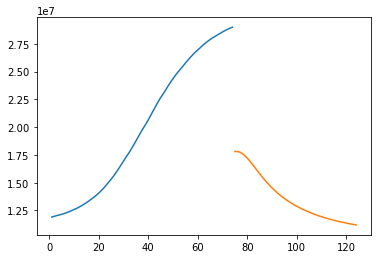

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[421:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

As We can see that for the next 50 Days the Total case prediction will drop out to this value 

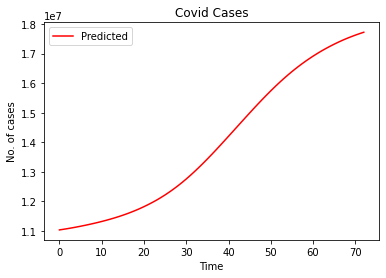

In [71]:
# Visualising the results
plt.plot(test_predict, color = 'red', label = 'Predicted')
plt.title('Covid Cases')
plt.xlabel('Time')
plt.ylabel('No. of cases')
plt.legend()
plt.show()